In [1]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os.path
import os

In [2]:
df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")

print(df['DK3619Code'])
dkcode_list = list(set(df['DK3619Code'].to_list()))
dkcode_list.sort()
id2dkcode = enumerate(dkcode_list)
id2dkcode = dict(id2dkcode)

dkcode2id = {}
for i in id2dkcode.items():
    dkcode2id[i[1]] = i[0]


print(dict(dkcode2id))

# Export the dkcode_list to a CSV file
dkcode_df = pd.DataFrame(dkcode_list, columns=['DK3619Code'])
dkcode_df.to_csv('dkcode_list.csv', index=False)

### Mapping data to numberic
# df['DK3619Code'] = df['DK3619Code'].map(dkcode2id)

### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()

0                 A_A
1                C_CA
2                C_CC
3          C_CE_CF_CD
4                C_CG
              ...    
3323742          Q_QB
3323743           R_R
3323744           S_S
3323745    C_CE_CF_CD
3323746          M_MA
Name: DK3619Code, Length: 3323747, dtype: object
{'A_A': 0, 'C_CA': 1, 'C_CC': 2, 'C_CE_CF_CD': 3, 'C_CG': 4, 'C_CH': 5, 'C_CI': 6, 'C_CJ': 7, 'C_CK': 8, 'C_CL': 9, 'C_CM_CB': 10, 'D_D': 11, 'E_E': 12, 'F_F': 13, 'G_G': 14, 'H_H': 15, 'I_I': 16, 'J_JA': 17, 'J_JB_JC': 18, 'K_K': 19, 'L_L': 20, 'M_MA': 21, 'M_MB': 22, 'M_MC': 23, 'N_N': 24, 'O_O': 25, 'PR_PR': 26, 'P_P': 27, 'Q_QA': 28, 'Q_QB': 29, 'R_R': 30, 'S_S': 31}


## With Lag_24

In [3]:
columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week', 
           'month', 'year', 'day_of_year', 'day_of_month', 
           'season', 'holiday', 'lag_24', 'Consumption_MWh']

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

Training RandomForestRegressor model with DKCode:  A_A


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 8.159681116796556
Mean Squared Error (MSE): 168.9444394667599
Root Mean Squared Error (RMSE): 12.997862880749278
R-squared (R²): 0.8726532802950259
  DK3619Code       MAE         MSE       RMSE        R2
0        A_A  8.159681  168.944439  12.997863  0.872653


/tmp/ipykernel_25/1702187450.py:72: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_df = pd.concat([performance_df, pd.DataFrame({


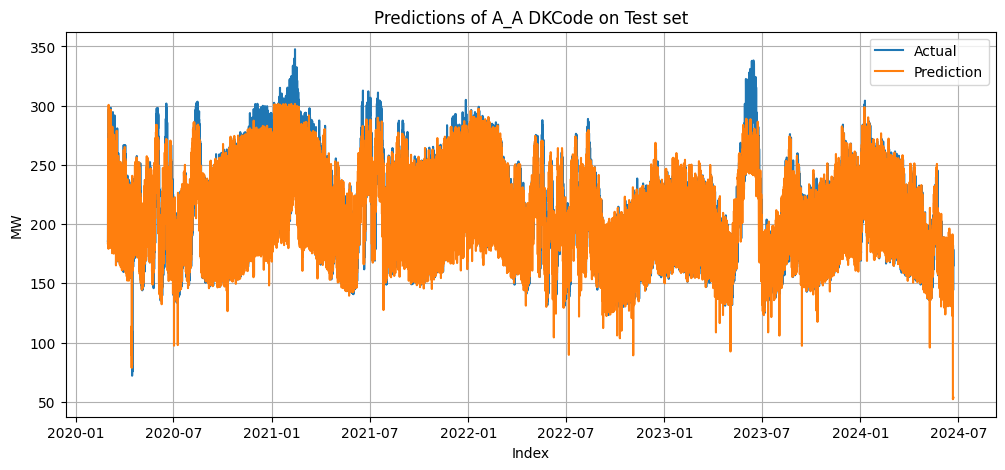

Training RandomForestRegressor model with DKCode:  C_CA


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 9.711255323961085
Mean Squared Error (MSE): 226.5365401210782
Root Mean Squared Error (RMSE): 15.051130858546085
R-squared (R²): 0.9039375978255272
  DK3619Code       MAE         MSE       RMSE        R2
0        A_A  8.159681  168.944439  12.997863  0.872653
1       C_CA  9.711255  226.536540  15.051131  0.903938


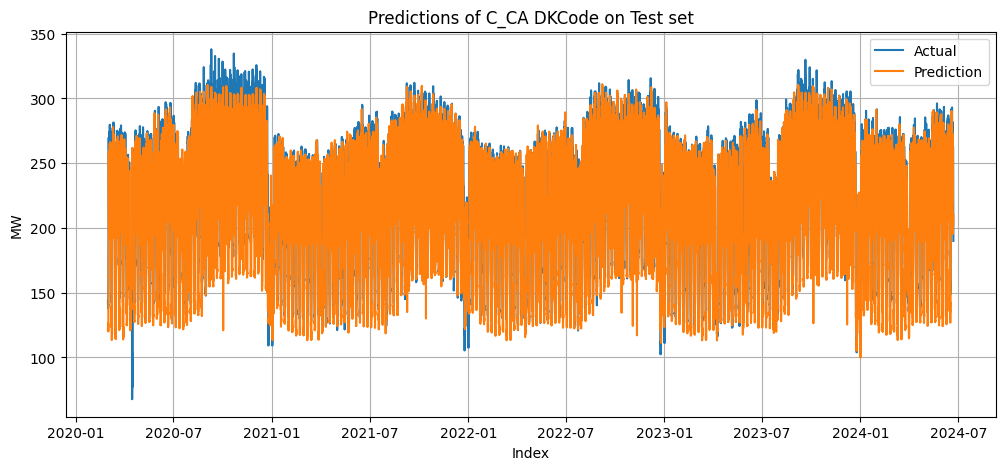

Training RandomForestRegressor model with DKCode:  C_CC


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 2.6910854356254137
Mean Squared Error (MSE): 16.206732637339762
Root Mean Squared Error (RMSE): 4.025758641217797
R-squared (R²): 0.9524656129822938
  DK3619Code       MAE         MSE       RMSE        R2
0        A_A  8.159681  168.944439  12.997863  0.872653
1       C_CA  9.711255  226.536540  15.051131  0.903938
2       C_CC  2.691085   16.206733   4.025759  0.952466


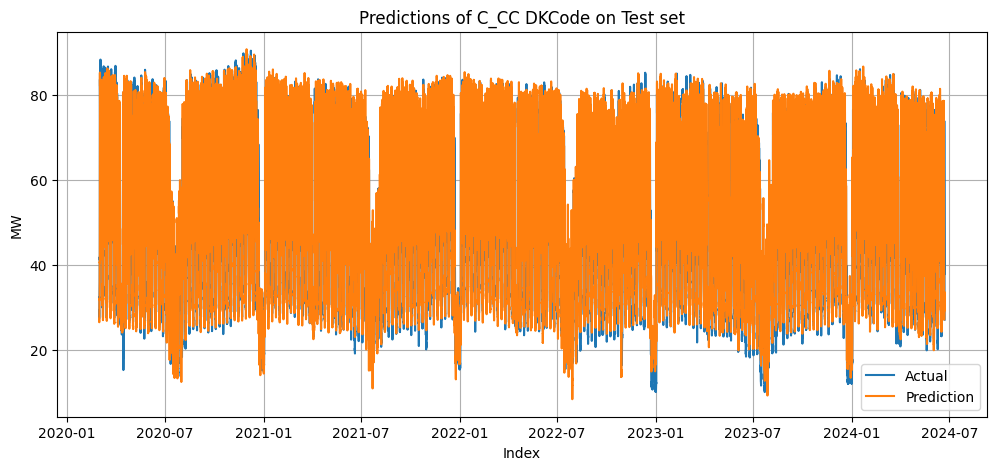

Training RandomForestRegressor model with DKCode:  C_CE_CF_CD


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 8.41765139303296
Mean Squared Error (MSE): 126.95654179063278
Root Mean Squared Error (RMSE): 11.267499358359546
R-squared (R²): 0.39720636492811845
   DK3619Code       MAE         MSE       RMSE        R2
0         A_A  8.159681  168.944439  12.997863  0.872653
1        C_CA  9.711255  226.536540  15.051131  0.903938
2        C_CC  2.691085   16.206733   4.025759  0.952466
3  C_CE_CF_CD  8.417651  126.956542  11.267499  0.397206


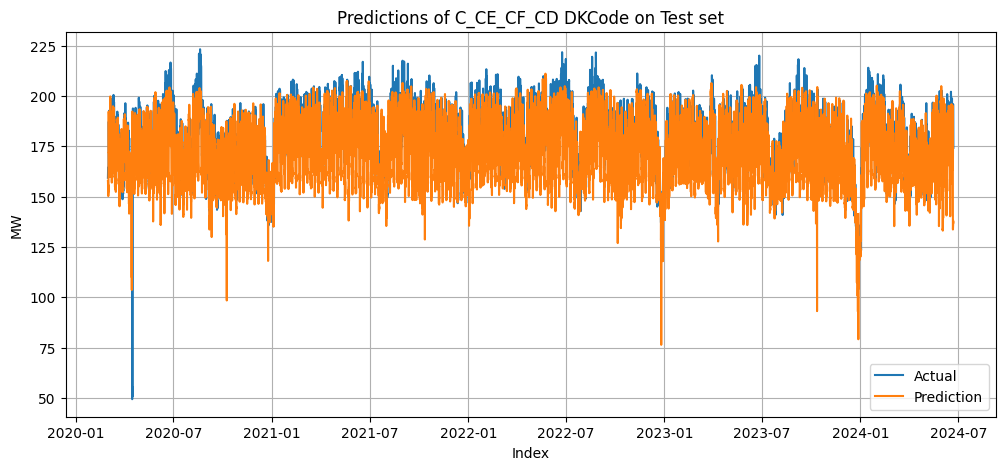

Training RandomForestRegressor model with DKCode:  C_CG


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 8.951147940914096
Mean Squared Error (MSE): 143.17719180889642
Root Mean Squared Error (RMSE): 11.965667211187867
R-squared (R²): 0.8539569813019594
   DK3619Code       MAE         MSE       RMSE        R2
0         A_A  8.159681  168.944439  12.997863  0.872653
1        C_CA  9.711255  226.536540  15.051131  0.903938
2        C_CC  2.691085   16.206733   4.025759  0.952466
3  C_CE_CF_CD  8.417651  126.956542  11.267499  0.397206
4        C_CG  8.951148  143.177192  11.965667  0.853957


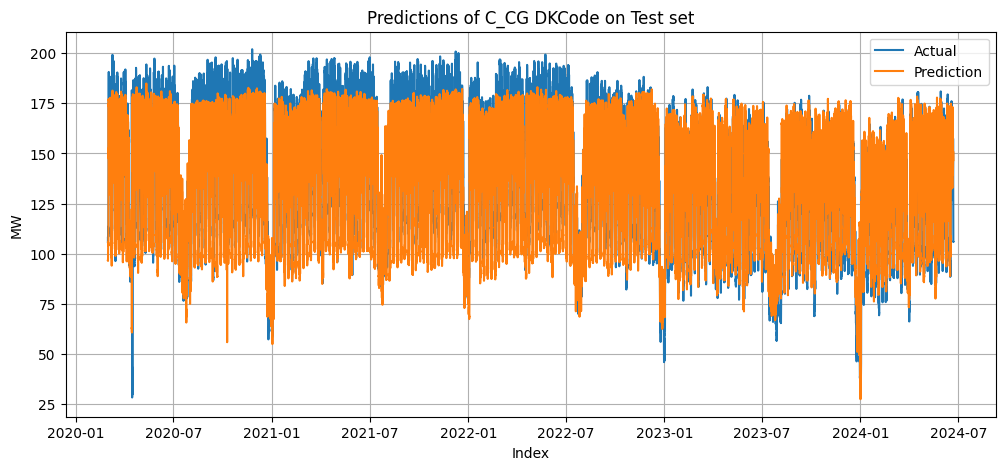

Training RandomForestRegressor model with DKCode:  C_CH


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 5.134625217731833
Mean Squared Error (MSE): 70.00753413323093
Root Mean Squared Error (RMSE): 8.367050503805444
R-squared (R²): 0.9656123836876402
   DK3619Code       MAE         MSE       RMSE        R2
0         A_A  8.159681  168.944439  12.997863  0.872653
1        C_CA  9.711255  226.536540  15.051131  0.903938
2        C_CC  2.691085   16.206733   4.025759  0.952466
3  C_CE_CF_CD  8.417651  126.956542  11.267499  0.397206
4        C_CG  8.951148  143.177192  11.965667  0.853957
5        C_CH  5.134625   70.007534   8.367051  0.965612


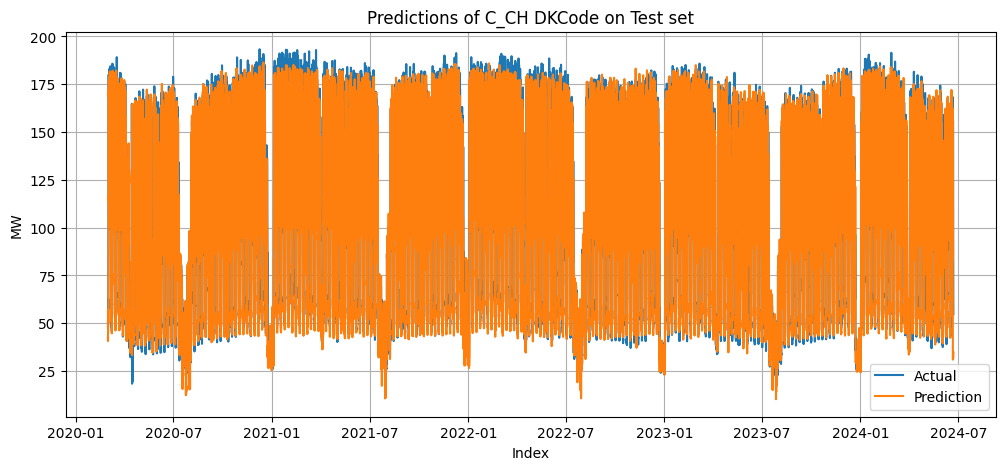

Training RandomForestRegressor model with DKCode:  C_CI


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 0.40554540117140964
Mean Squared Error (MSE): 0.40950317572011447
Root Mean Squared Error (RMSE): 0.6399243515604907
R-squared (R²): 0.9446256447101251
   DK3619Code       MAE         MSE       RMSE        R2
0         A_A  8.159681  168.944439  12.997863  0.872653
1        C_CA  9.711255  226.536540  15.051131  0.903938
2        C_CC  2.691085   16.206733   4.025759  0.952466
3  C_CE_CF_CD  8.417651  126.956542  11.267499  0.397206
4        C_CG  8.951148  143.177192  11.965667  0.853957
5        C_CH  5.134625   70.007534   8.367051  0.965612
6        C_CI  0.405545    0.409503   0.639924  0.944626


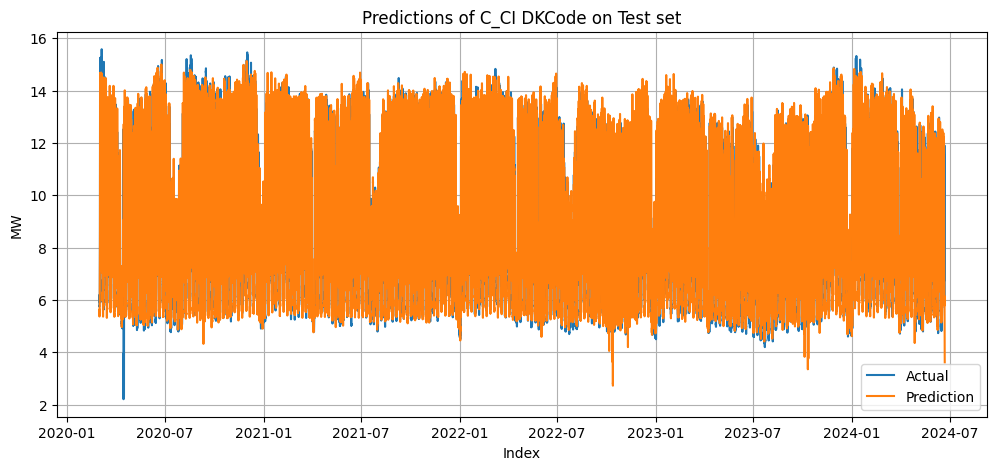

Training RandomForestRegressor model with DKCode:  C_CJ


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 0.5041940998686962
Mean Squared Error (MSE): 0.64206818428444
Root Mean Squared Error (RMSE): 0.8012915725779475
R-squared (R²): 0.9596997595689509
   DK3619Code       MAE         MSE       RMSE        R2
0         A_A  8.159681  168.944439  12.997863  0.872653
1        C_CA  9.711255  226.536540  15.051131  0.903938
2        C_CC  2.691085   16.206733   4.025759  0.952466
3  C_CE_CF_CD  8.417651  126.956542  11.267499  0.397206
4        C_CG  8.951148  143.177192  11.965667  0.853957
5        C_CH  5.134625   70.007534   8.367051  0.965612
6        C_CI  0.405545    0.409503   0.639924  0.944626
7        C_CJ  0.504194    0.642068   0.801292  0.959700


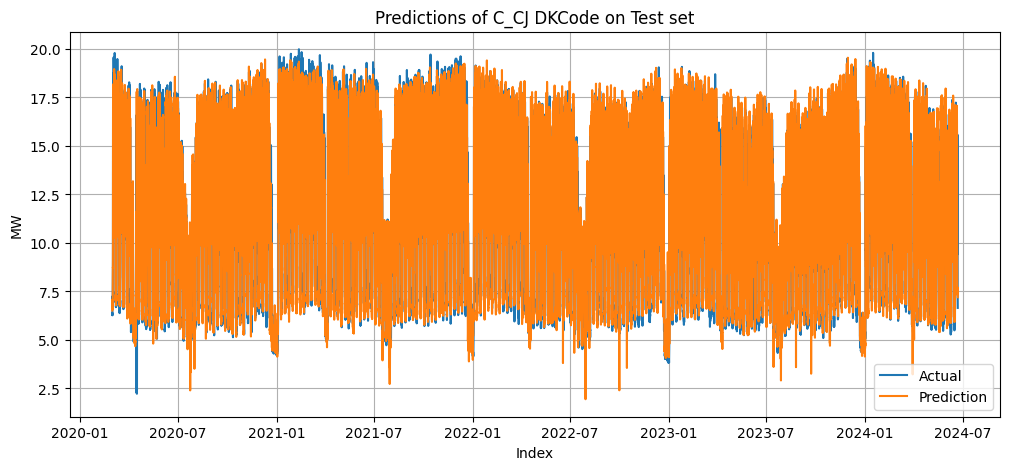

Training RandomForestRegressor model with DKCode:  C_CK


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 2.5888647628775647
Mean Squared Error (MSE): 19.346061106587428
Root Mean Squared Error (RMSE): 4.39841574962934
R-squared (R²): 0.959988189317645
   DK3619Code       MAE         MSE       RMSE        R2
0         A_A  8.159681  168.944439  12.997863  0.872653
1        C_CA  9.711255  226.536540  15.051131  0.903938
2        C_CC  2.691085   16.206733   4.025759  0.952466
3  C_CE_CF_CD  8.417651  126.956542  11.267499  0.397206
4        C_CG  8.951148  143.177192  11.965667  0.853957
5        C_CH  5.134625   70.007534   8.367051  0.965612
6        C_CI  0.405545    0.409503   0.639924  0.944626
7        C_CJ  0.504194    0.642068   0.801292  0.959700
8        C_CK  2.588865   19.346061   4.398416  0.959988


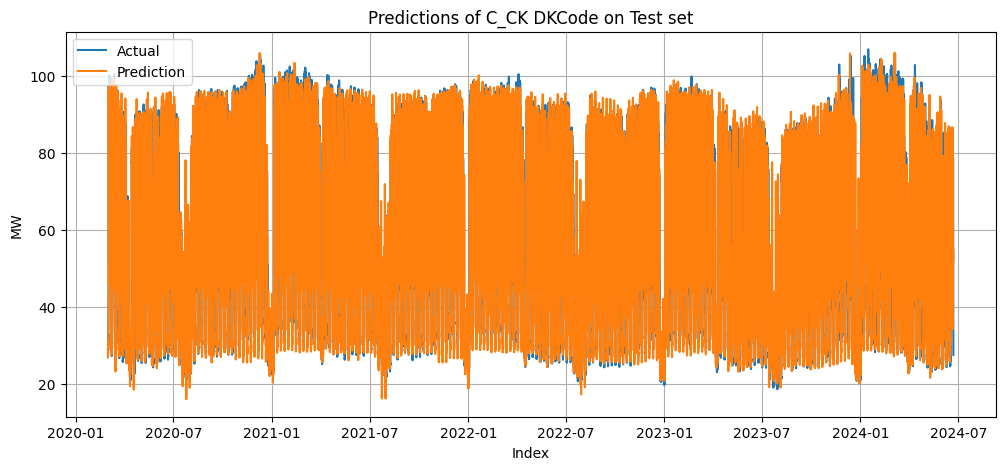

Training RandomForestRegressor model with DKCode:  C_CL


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 0.5757749830054267
Mean Squared Error (MSE): 0.7725400230715637
Root Mean Squared Error (RMSE): 0.8789425595973628
R-squared (R²): 0.944728984286578
   DK3619Code       MAE         MSE       RMSE        R2
0         A_A  8.159681  168.944439  12.997863  0.872653
1        C_CA  9.711255  226.536540  15.051131  0.903938
2        C_CC  2.691085   16.206733   4.025759  0.952466
3  C_CE_CF_CD  8.417651  126.956542  11.267499  0.397206
4        C_CG  8.951148  143.177192  11.965667  0.853957
5        C_CH  5.134625   70.007534   8.367051  0.965612
6        C_CI  0.405545    0.409503   0.639924  0.944626
7        C_CJ  0.504194    0.642068   0.801292  0.959700
8        C_CK  2.588865   19.346061   4.398416  0.959988
9        C_CL  0.575775    0.772540   0.878943  0.944729


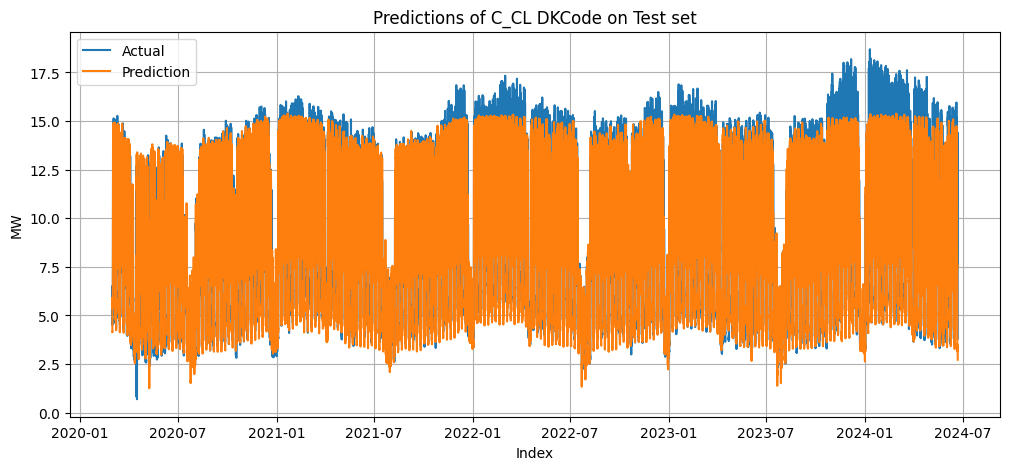

Training RandomForestRegressor model with DKCode:  C_CM_CB


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 1.8964649763692922
Mean Squared Error (MSE): 9.01440570622614
Root Mean Squared Error (RMSE): 3.002399991044854
R-squared (R²): 0.9678082156139652
    DK3619Code       MAE         MSE       RMSE        R2
0          A_A  8.159681  168.944439  12.997863  0.872653
1         C_CA  9.711255  226.536540  15.051131  0.903938
2         C_CC  2.691085   16.206733   4.025759  0.952466
3   C_CE_CF_CD  8.417651  126.956542  11.267499  0.397206
4         C_CG  8.951148  143.177192  11.965667  0.853957
5         C_CH  5.134625   70.007534   8.367051  0.965612
6         C_CI  0.405545    0.409503   0.639924  0.944626
7         C_CJ  0.504194    0.642068   0.801292  0.959700
8         C_CK  2.588865   19.346061   4.398416  0.959988
9         C_CL  0.575775    0.772540   0.878943  0.944729
10     C_CM_CB  1.896465    9.014406   3.002400  0.967808


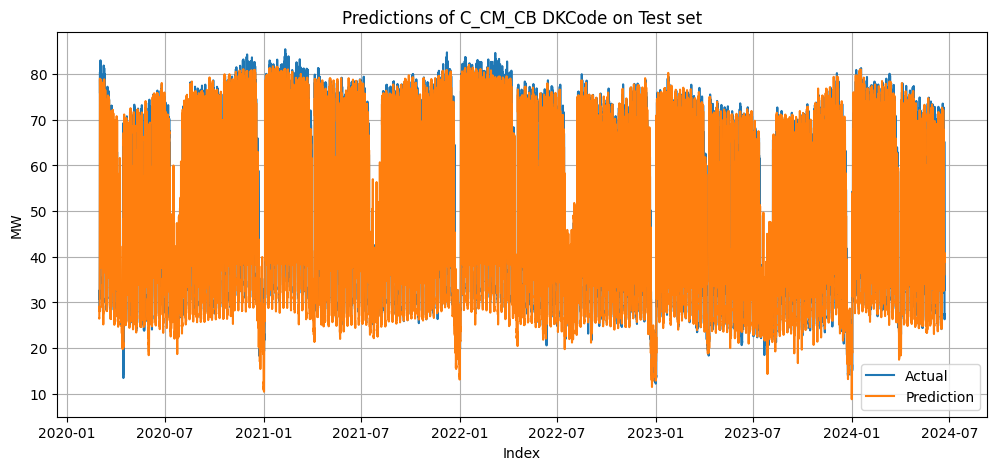

Training RandomForestRegressor model with DKCode:  D_D


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 131.0547657951362
Mean Squared Error (MSE): 50582.24399301958
Root Mean Squared Error (RMSE): 224.90496658148655
R-squared (R²): -0.059554313753426236
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554


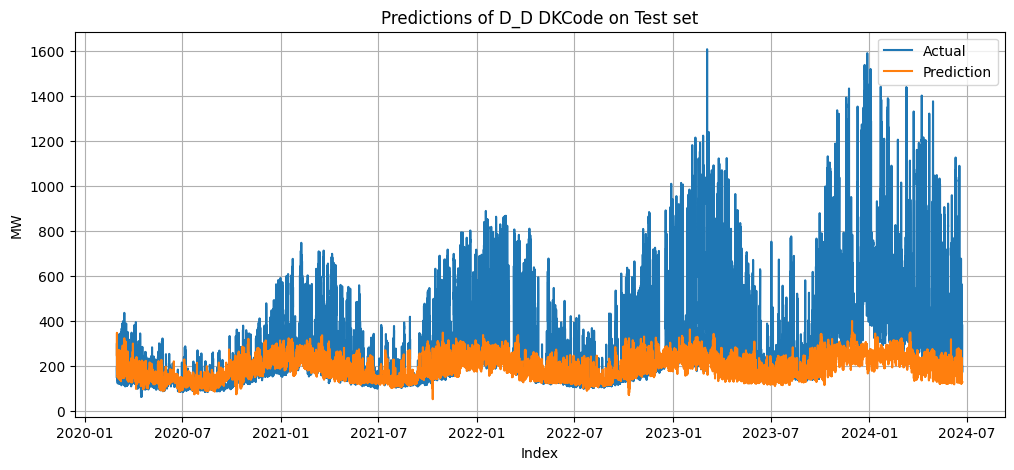

Training RandomForestRegressor model with DKCode:  E_E


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 7.456591081963732
Mean Squared Error (MSE): 144.3014968058059
Root Mean Squared Error (RMSE): 12.01255579823902
R-squared (R²): 0.5170152296121197
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12     

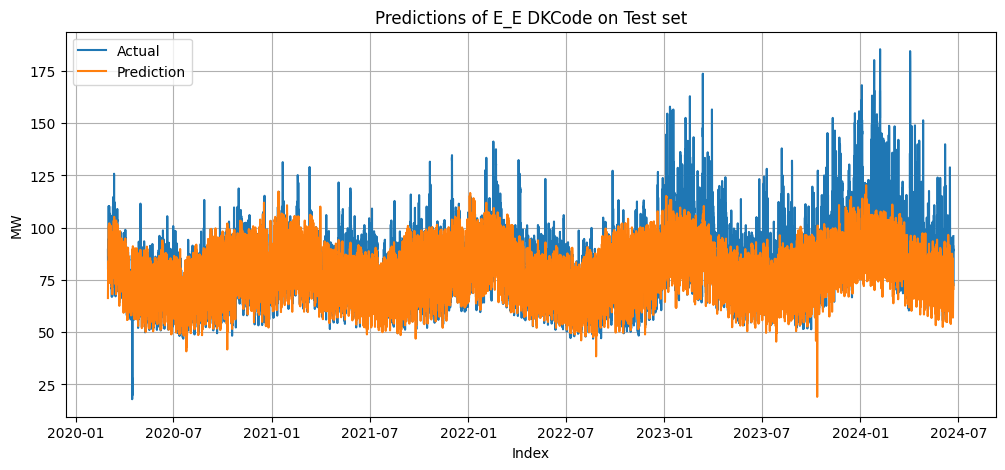

Training RandomForestRegressor model with DKCode:  F_F


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 2.899217152839179
Mean Squared Error (MSE): 35.520553215384986
Root Mean Squared Error (RMSE): 5.959912181851759
R-squared (R²): 0.842476324654768
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12     

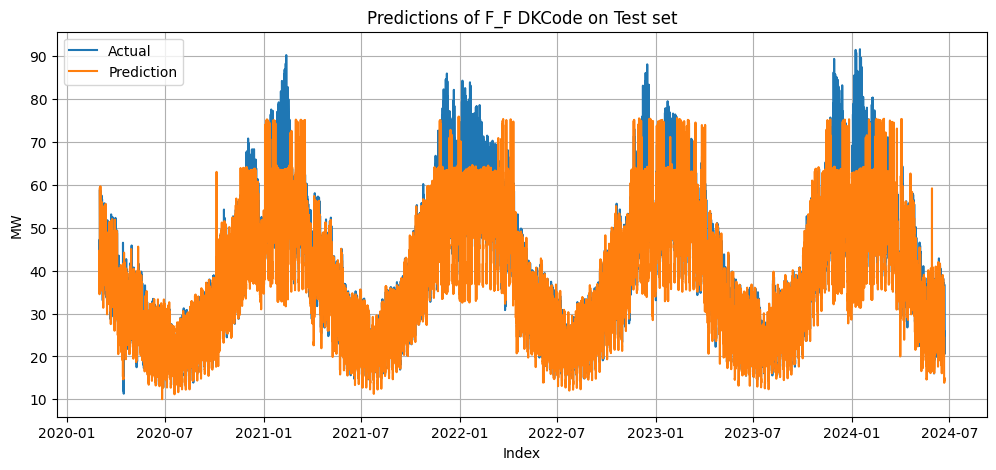

Training RandomForestRegressor model with DKCode:  G_G


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 9.683821958847913
Mean Squared Error (MSE): 406.31816549884303
Root Mean Squared Error (RMSE): 20.15733527773061
R-squared (R²): 0.9546290019343009
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12    

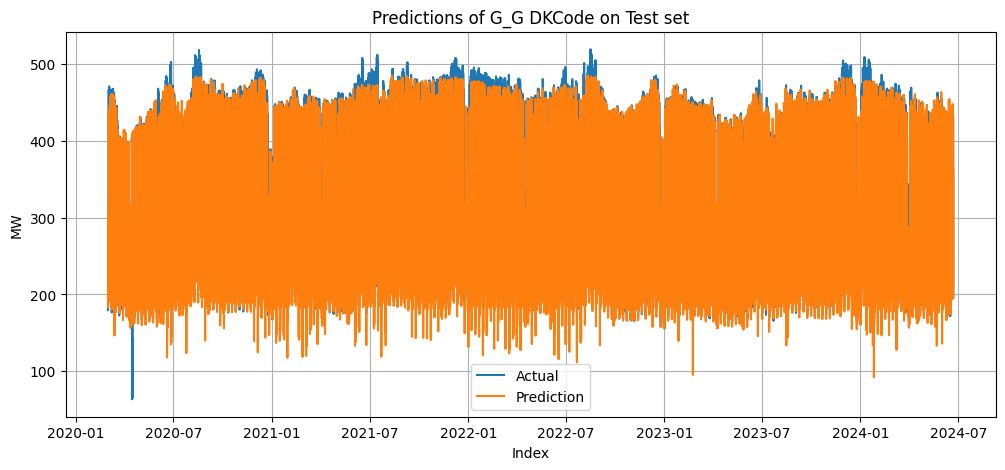

Training RandomForestRegressor model with DKCode:  H_H


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 7.6452841000344165
Mean Squared Error (MSE): 129.77303923380393
Root Mean Squared Error (RMSE): 11.391797015124697
R-squared (R²): 0.8117416162747843
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12  

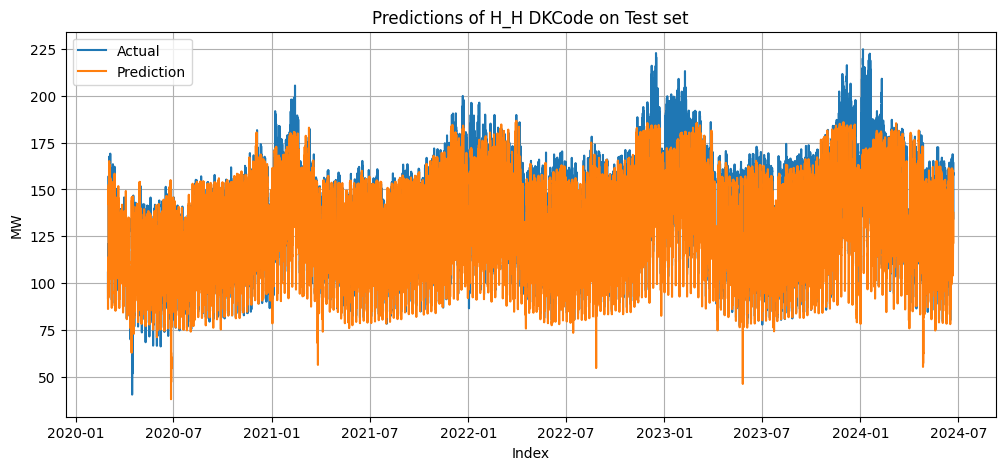

Training RandomForestRegressor model with DKCode:  I_I


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 4.421469047269096
Mean Squared Error (MSE): 56.939863810476034
Root Mean Squared Error (RMSE): 7.545850767837649
R-squared (R²): 0.9345489764162224
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12    

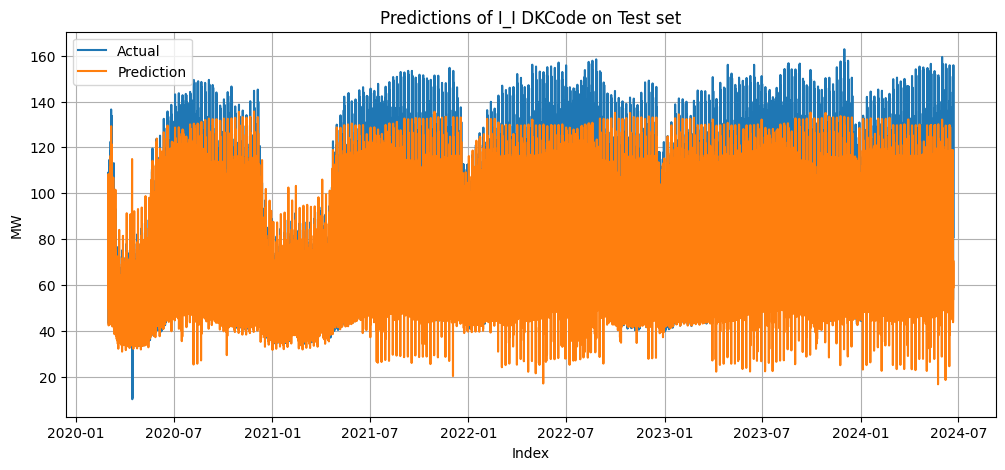

Training RandomForestRegressor model with DKCode:  J_JA


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 0.48191501725188624
Mean Squared Error (MSE): 0.6139492745342199
Root Mean Squared Error (RMSE): 0.783549152596198
R-squared (R²): 0.8897509042344544
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12  

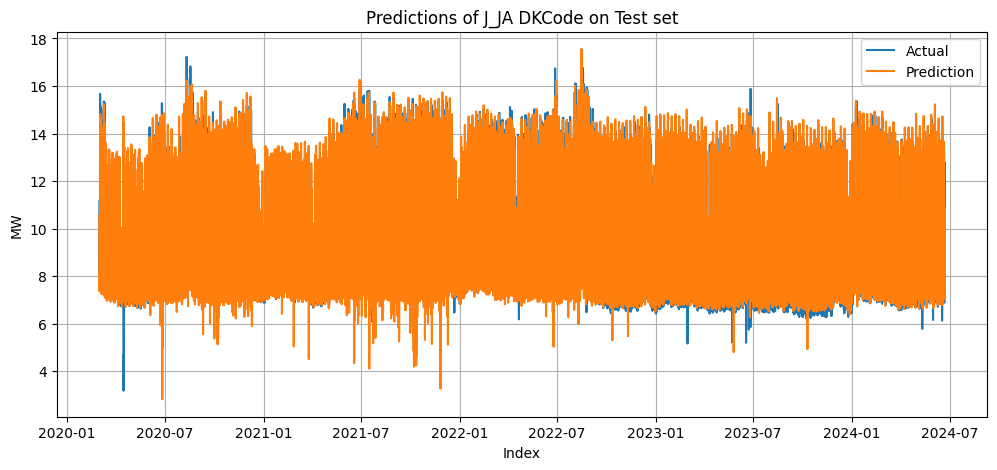

Training RandomForestRegressor model with DKCode:  J_JB_JC


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 30.21871043498345
Mean Squared Error (MSE): 1331.4600324513206
Root Mean Squared Error (RMSE): 36.48917692208637
R-squared (R²): -4.209721598161205
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12    

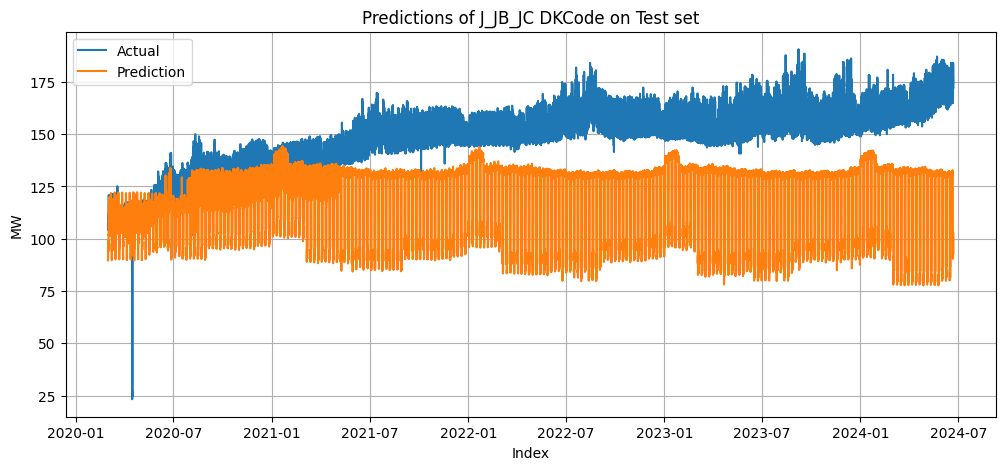

Training RandomForestRegressor model with DKCode:  K_K


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 1.4118178313291858
Mean Squared Error (MSE): 5.54358888993972
Root Mean Squared Error (RMSE): 2.3544827223701854
R-squared (R²): 0.9330966651545748
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12    

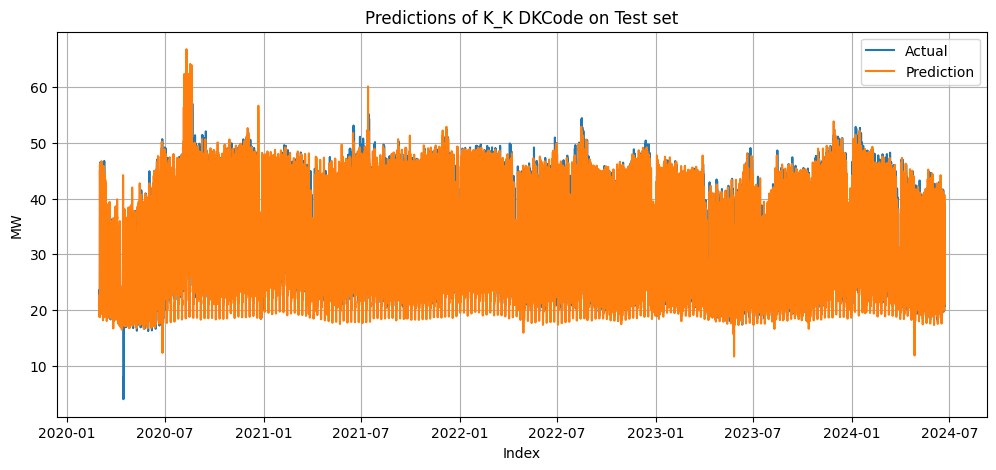

Training RandomForestRegressor model with DKCode:  L_L


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 6.526871866512509
Mean Squared Error (MSE): 120.54652047500127
Root Mean Squared Error (RMSE): 10.979367945150635
R-squared (R²): 0.9121278919692544
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12   

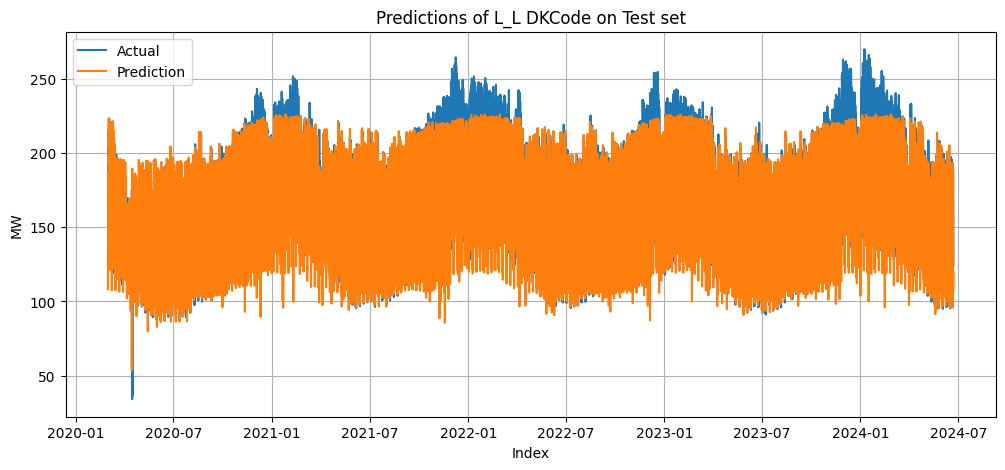

Training RandomForestRegressor model with DKCode:  M_MA


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 2.655397181445136
Mean Squared Error (MSE): 19.606481663743953
Root Mean Squared Error (RMSE): 4.427920693027818
R-squared (R²): 0.7798187536192328
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12    

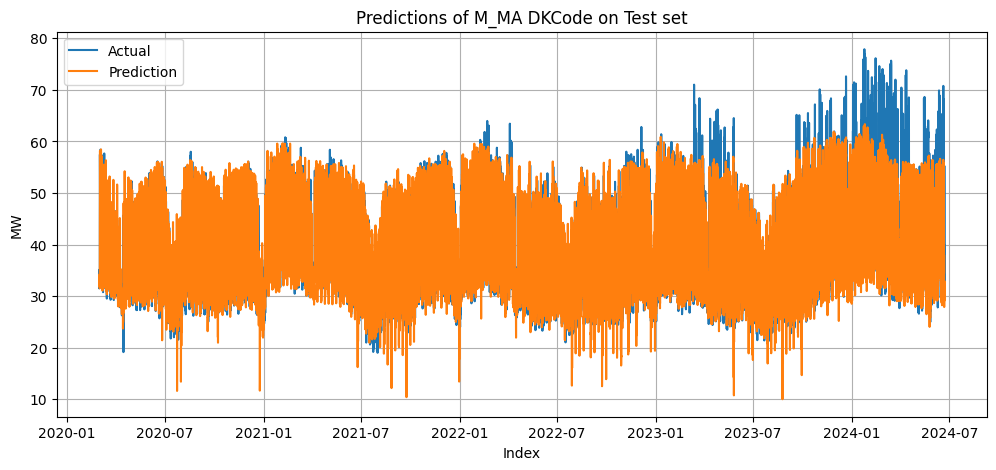

Training RandomForestRegressor model with DKCode:  M_MB


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 1.101209516473064
Mean Squared Error (MSE): 2.8041704264597294
Root Mean Squared Error (RMSE): 1.6745657426508311
R-squared (R²): 0.8008020774764405
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12   

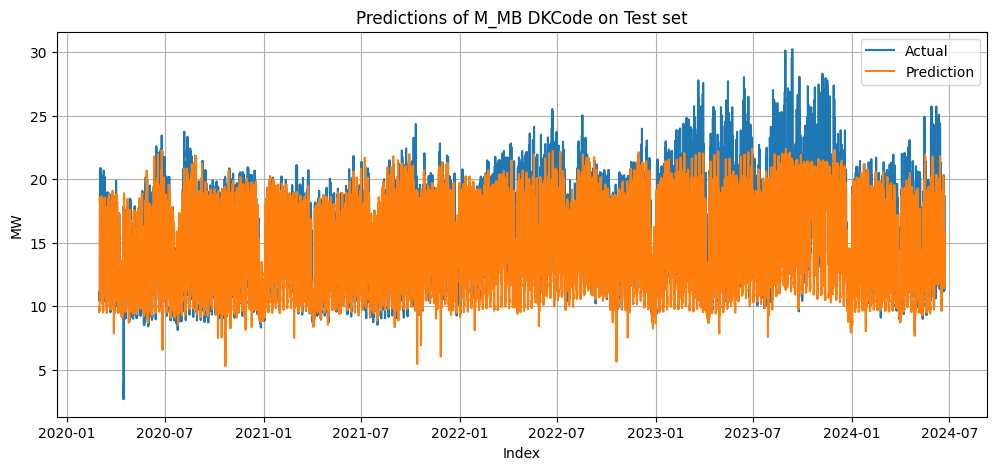

Training RandomForestRegressor model with DKCode:  M_MC


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 0.25672797369106554
Mean Squared Error (MSE): 1.5444397875808473
Root Mean Squared Error (RMSE): 1.2427549185502536
R-squared (R²): 0.5460798205987849
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12 

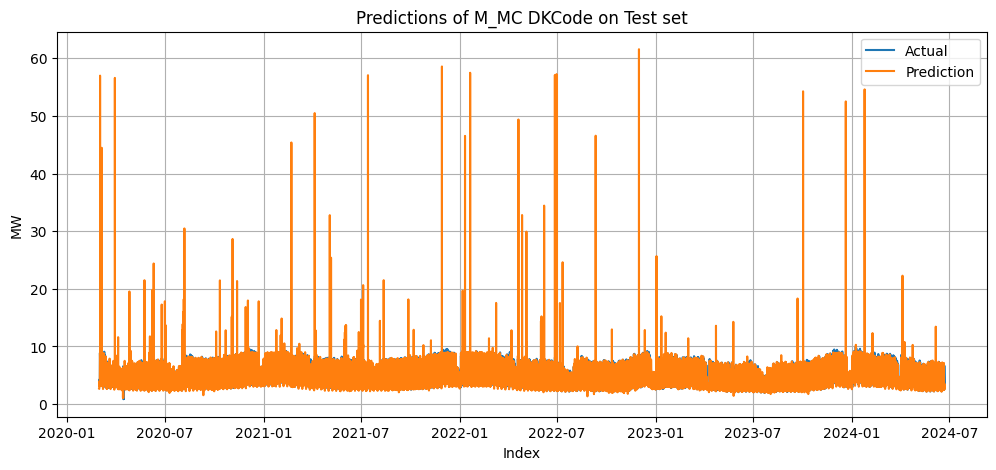

Training RandomForestRegressor model with DKCode:  N_N


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 1.3163243232135011
Mean Squared Error (MSE): 9.821489382372206
Root Mean Squared Error (RMSE): 3.133925554695294
R-squared (R²): 0.83926868104573
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12      

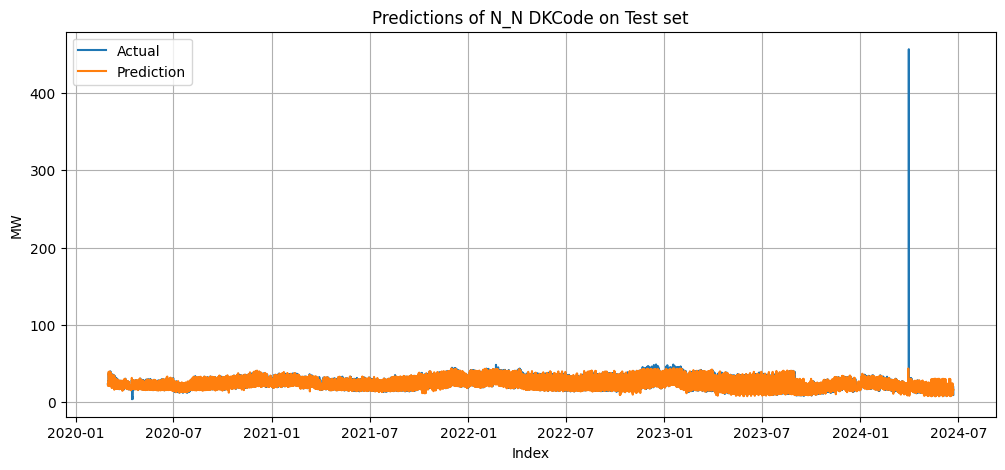

Training RandomForestRegressor model with DKCode:  O_O


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 5.904433377503639
Mean Squared Error (MSE): 108.8809477453632
Root Mean Squared Error (RMSE): 10.434603382273961
R-squared (R²): 0.9565318883681068
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12    

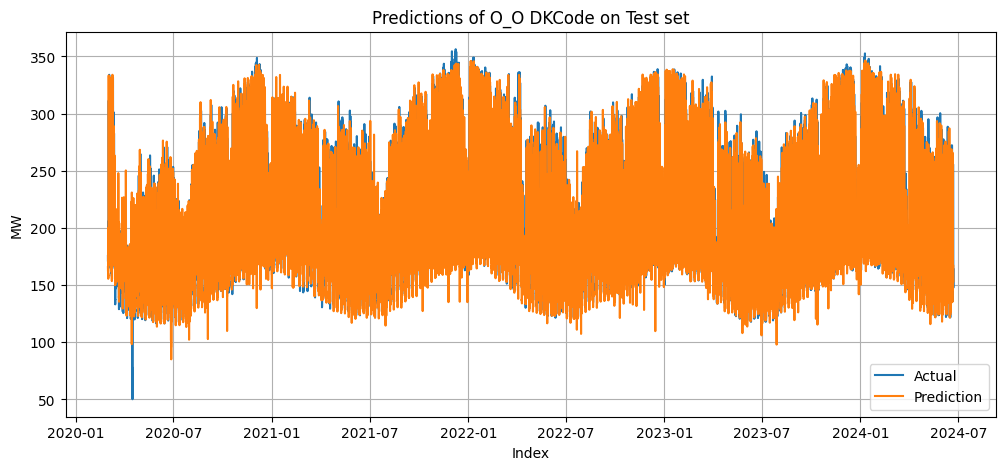

Training RandomForestRegressor model with DKCode:  PR_PR


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 62.791970370915415
Mean Squared Error (MSE): 10715.25489658156
Root Mean Squared Error (RMSE): 103.51451539074876
R-squared (R²): 0.9067487624177164
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12   

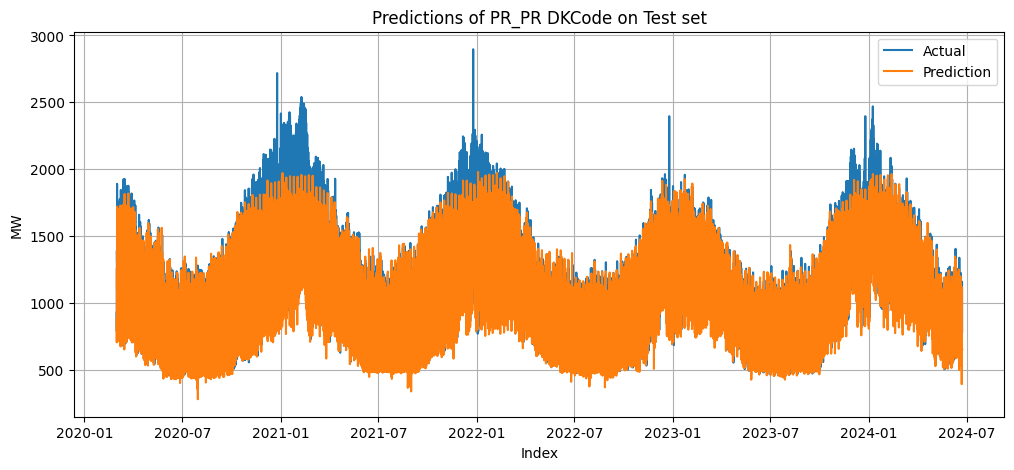

Training RandomForestRegressor model with DKCode:  P_P


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 2.030174918281402
Mean Squared Error (MSE): 18.507403140073155
Root Mean Squared Error (RMSE): 4.302023144995056
R-squared (R²): 0.9569115479817523
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12    

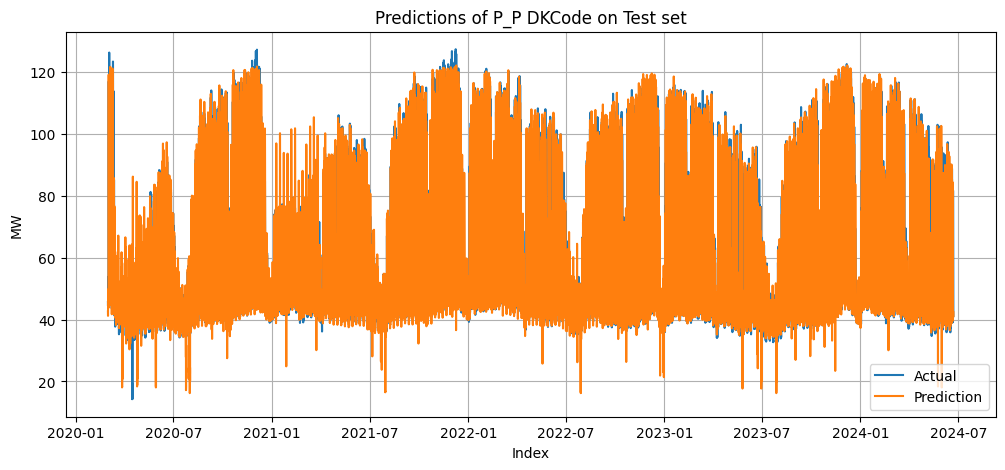

Training RandomForestRegressor model with DKCode:  Q_QA


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 0.5507767945450694
Mean Squared Error (MSE): 1.1144166931416242
Root Mean Squared Error (RMSE): 1.0556593641613872
R-squared (R²): 0.9357271761007946
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12  

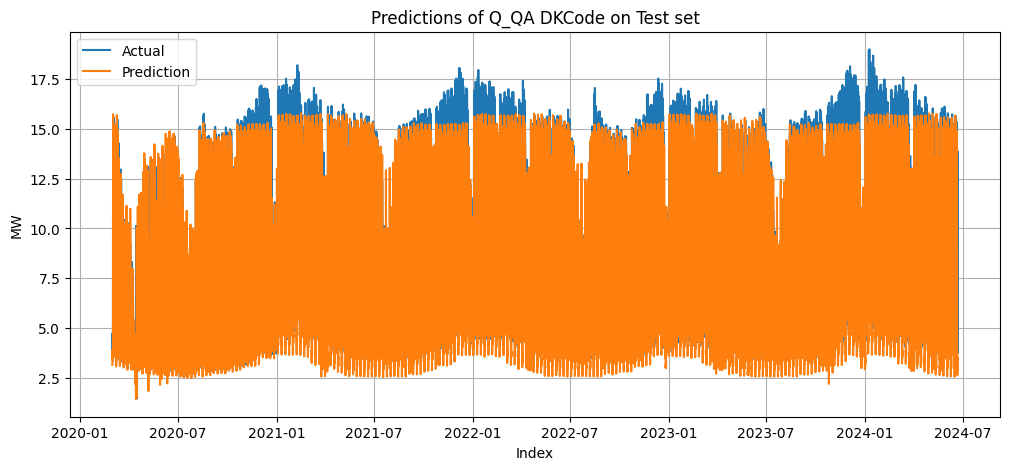

Training RandomForestRegressor model with DKCode:  Q_QB


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 0.6673060064513571
Mean Squared Error (MSE): 1.3776580516064572
Root Mean Squared Error (RMSE): 1.173736789747368
R-squared (R²): 0.9040770344610647
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12   

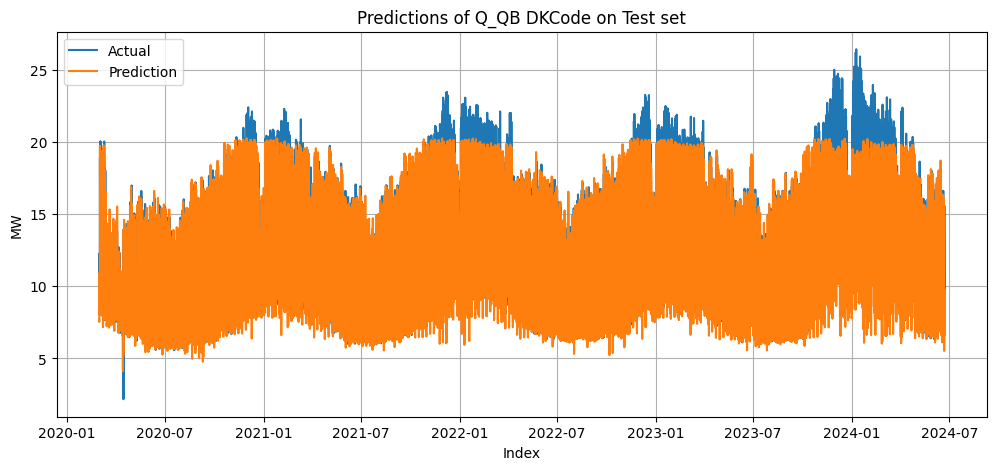

Training RandomForestRegressor model with DKCode:  R_R


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 1.1812339248015882
Mean Squared Error (MSE): 3.5296237455569797
Root Mean Squared Error (RMSE): 1.8787292901205803
R-squared (R²): 0.9643953479057196
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12  

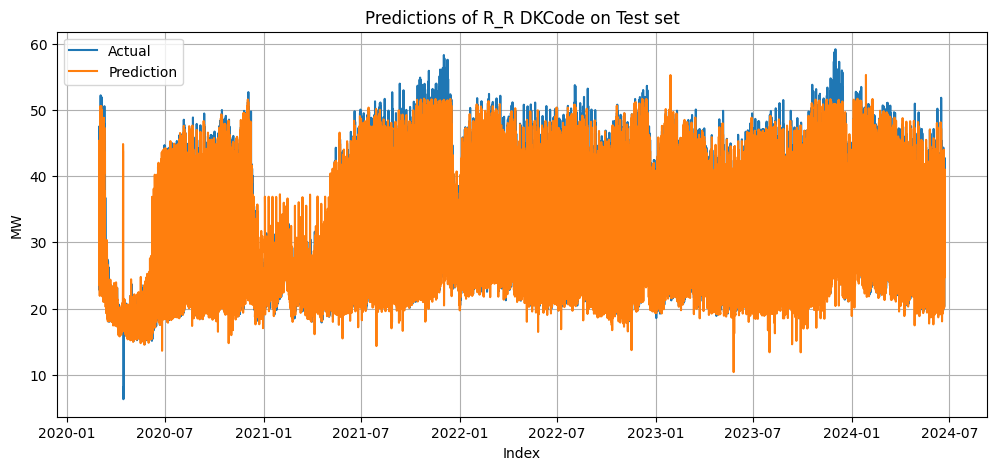

Training RandomForestRegressor model with DKCode:  S_S


/tmp/ipykernel_25/1702187450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['lag_24'] = df_corr['lag_24'].fillna(0)
/tmp/ipykernel_25/1702187450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_25/1702187450.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Mean Absolute Error (MAE): 1.7344877975796158
Mean Squared Error (MSE): 7.927565472625355
Root Mean Squared Error (RMSE): 2.8155932718745715
R-squared (R²): 0.9323959457536628
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12   

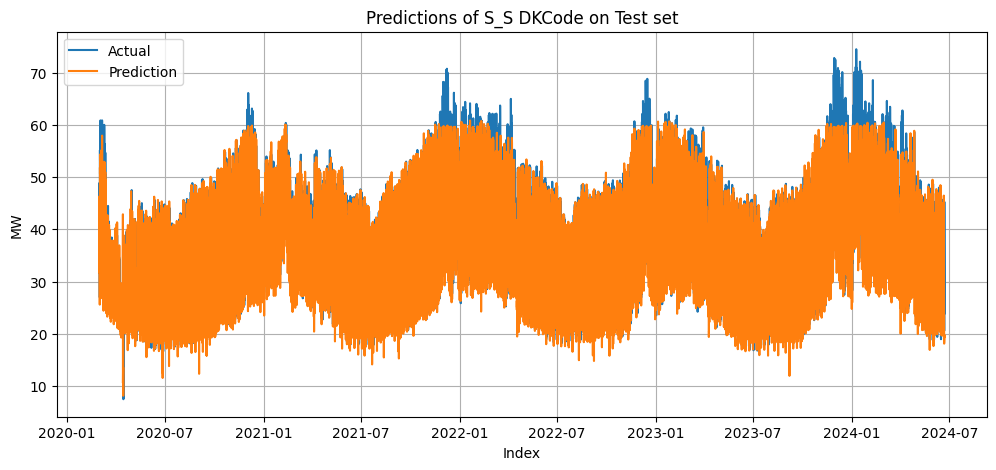

    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    8.159681    168.944439   12.997863  0.872653
1         C_CA    9.711255    226.536540   15.051131  0.903938
2         C_CC    2.691085     16.206733    4.025759  0.952466
3   C_CE_CF_CD    8.417651    126.956542   11.267499  0.397206
4         C_CG    8.951148    143.177192   11.965667  0.853957
5         C_CH    5.134625     70.007534    8.367051  0.965612
6         C_CI    0.405545      0.409503    0.639924  0.944626
7         C_CJ    0.504194      0.642068    0.801292  0.959700
8         C_CK    2.588865     19.346061    4.398416  0.959988
9         C_CL    0.575775      0.772540    0.878943  0.944729
10     C_CM_CB    1.896465      9.014406    3.002400  0.967808
11         D_D  131.054766  50582.243993  224.904967 -0.059554
12         E_E    7.456591    144.301497   12.012556  0.517015
13         F_F    2.899217     35.520553    5.959912  0.842476
14         G_G    9.683822    406.318165   20.157335  0

In [4]:
#all_dkcode_trainings
if not os.path.exists("/kaggle/working/Checkpoints/"):
    os.makedirs("/kaggle/working/Checkpoints/")
    
#all_dkcode_trainings
if not os.path.exists("/kaggle/working/Prediction/"):
    os.makedirs("/kaggle/working/Prediction/")
    
# Initialize an empty DataFrame to store the performance metrics
performance_df = pd.DataFrame(columns=['DK3619Code', 'MAE', 'MSE', 'RMSE', 'R2'])

for i in dkcode_list:
    if os.path.exists("/kaggle/working/Checkpoints/" + i + "_RandomForestRegressor_model.pkl"):
        continue
    print('Training RandomForestRegressor model with DKCode: ', i)
    df_filter = df[df['DK3619Code'] == i]
    df_corr = df_filter[columns]
    
    df_corr['lag_24'] = df_corr['lag_24'].fillna(0)

    df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
    df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

    df_corr = df_corr.sort_values(by='HourDK')

    # Split the data
    split_time = pd.Timestamp("2020-02-01")
    df_train, df_temp = split_train_test(df_corr, split_time)
    split_time_valid = pd.Timestamp("2020-03-01")
    df_valid, df_test = split_train_test(df_temp, split_time_valid)
    
    test_time = df_test[['HourDK']]
    
    # Drop datetime columns after splitting
    df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
    df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
    df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

    # Define target and features
    y_train = df_train[['Consumption_MWh']]  # Target variable
    x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

    y_valid = df_valid[['Consumption_MWh']]
    x_valid = df_valid.drop(columns=['Consumption_MWh'])

    y_test = df_test[['Consumption_MWh']]
    x_test = df_test.drop(columns=['Consumption_MWh'])

    # Khởi tạo và fit model
    model = RandomForestRegressor(n_estimators=100, random_state=10)
    model.fit(x_train, y_train)

    # Lưu model
    joblib.dump(model, "/kaggle/working/Checkpoints/" + i + "_RandomForestRegressor_model.pkl")
    # Load model from file
    model = joblib.load("/kaggle/working/Checkpoints/" + i + "_RandomForestRegressor_model.pkl")

    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²): {r2}')

    # Append metrics to the performance DataFrame
    performance_df = pd.concat([performance_df, pd.DataFrame({
        'DK3619Code': [i],
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse],
        'R2': [r2]
    })], ignore_index=True)
    
    print(performance_df)
    
    pred_df = compute_predictions_df(model, x_test, y_test)

    # Merge data into df_corr
    pred_df = pd.merge(test_time, pred_df, left_index=True, right_index=True)
    pred_df = pred_df[['HourDK', 'actual', 'prediction', 'squared_error']]
    
    pred_df.to_csv("/kaggle/working/Prediction/" + i + "_DF_Prediction.csv", index=False)
    
    plt.figure(figsize=(12, 5))
    start = pred_df['HourDK'].min()
    end = pred_df['HourDK'].max()
    plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
    plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
    plt.title("Predictions of " + i + " DKCode on Test set")
    plt.xlabel('Index')
    plt.ylabel('MW')
    plt.legend()
    plt.grid()
    plt.show()

# Save performance DataFrame to CSV
performance_df.to_csv("/kaggle/working/Performance_Metrics_WithLag.csv", index=False)

# Display the performance DataFrame
print(performance_df)

## Without Lag_24

In [5]:
# df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")

# print(df['DK3619Code'])
# dkcode_list = list(set(df['DK3619Code'].to_list()))
# dkcode_list.sort()
# id2dkcode = enumerate(dkcode_list)
# id2dkcode = dict(id2dkcode)

# dkcode2id = {}
# for i in id2dkcode.items():
#     dkcode2id[i[1]] = i[0]


# print(dict(dkcode2id))

# # Export the dkcode_list to a CSV file
# dkcode_df = pd.DataFrame(dkcode_list, columns=['DK3619Code'])
# dkcode_df.to_csv('dkcode_list.csv', index=False)

# ### Mapping data to numberic
# # df['DK3619Code'] = df['DK3619Code'].map(dkcode2id)

# ### Season mapping 

# seasons_mapping = {
#     'Spring': 0,
#     'Summer': 1,
#     'Autumn': 2,
#     'Winter': 3
# }

# df['season'] = df['season'].map(seasons_mapping)

# # Convert holiday to binary indicator
# df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# # Xóa tất cả các hàng có giá trị null
# df_cleaned = df.dropna()

In [6]:
# columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week', 
#            'month', 'year', 'day_of_year', 'day_of_month', 
#            'season', 'holiday', 'Consumption_MWh']

# # Split function
# def split_train_test(df, split_time):
#     df_train = df.loc[df['HourDK'] < split_time]
#     df_test = df.loc[df['HourDK'] >= split_time]
#     return df_train, df_test

# def compute_predictions_df(model, X, y):
#     y_pred = model.predict(X)
#     df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
#     df["squared_error"] = (df["actual"] - df["prediction"])**2
#     return df

In [7]:
# # Create directories if they don't exist
# if not os.path.exists("/kaggle/working/Checkpoints_noLag/"):
#     os.makedirs("/kaggle/working/Checkpoints_noLag/")
    
# if not os.path.exists("/kaggle/working/Prediction_noLag/"):
#     os.makedirs("/kaggle/working/Prediction_noLag/")
    
# # Initialize an empty DataFrame to store the performance metrics
# performance_df = pd.DataFrame(columns=['DK3619Code', 'MAE', 'MSE', 'RMSE', 'R2'])

# for i in dkcode_list:
#     if os.path.exists("/kaggle/working/Checkpoints_noLag/" + i + "_RandomForestRegressor_model.pkl"):
#         continue
#     print('Training RandomForestRegressor model with DKCode: ', i)
#     df_filter = df[df['DK3619Code'] == i]
#     df_corr = df_filter[columns]
    
#     #df_corr['lag_24'] = df_corr['lag_24'].fillna(0)

#     df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
#     df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

#     df_corr = df_corr.sort_values(by='HourDK')

#     # Split the data
#     split_time = pd.Timestamp("2020-02-01")
#     df_train, df_temp = split_train_test(df_corr, split_time)
#     split_time_valid = pd.Timestamp("2020-03-01")
#     df_valid, df_test = split_train_test(df_temp, split_time_valid)
    
#     test_time = df_test[['HourDK']]
    
#     # Drop datetime columns after splitting
#     df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
#     df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
#     df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

#     # Define target and features
#     y_train = df_train[['Consumption_MWh']]  # Target variable
#     x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

#     y_valid = df_valid[['Consumption_MWh']]
#     x_valid = df_valid.drop(columns=['Consumption_MWh'])

#     y_test = df_test[['Consumption_MWh']]
#     x_test = df_test.drop(columns=['Consumption_MWh'])

#     # Khởi tạo và fit model
#     model = RandomForestRegressor(n_estimators=100, random_state=10)
#     model.fit(x_train, y_train)

#     # Lưu model
#     joblib.dump(model, "/kaggle/working/Checkpoints_noLag/" + i + "_RandomForestRegressor_model.pkl")
#     # Load model from file
#     model = joblib.load("/kaggle/working/Checkpoints_noLag/" + i + "_RandomForestRegressor_model.pkl")

#     y_pred = model.predict(x_test)
    
#     # Calculate evaluation metrics
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, y_pred)

#     print(f'Mean Absolute Error (MAE): {mae}')
#     print(f'Mean Squared Error (MSE): {mse}')
#     print(f'Root Mean Squared Error (RMSE): {rmse}')
#     print(f'R-squared (R²): {r2}')

#     # Append metrics to the performance DataFrame
#     performance_df = pd.concat([performance_df, pd.DataFrame({
#         'DK3619Code': [i],
#         'MAE': [mae],
#         'MSE': [mse],
#         'RMSE': [rmse],
#         'R2': [r2]
#     })], ignore_index=True)
    
#     print(performance_df)
    
#     pred_df = compute_predictions_df(model, x_test, y_test)

#     # Merge data into df_corr
#     pred_df = pd.merge(test_time, pred_df, left_index=True, right_index=True)
#     pred_df = pred_df[['HourDK', 'actual', 'prediction', 'squared_error']]
    
#     pred_df.to_csv("/kaggle/working/Prediction_noLag/" + i + "_DF_Prediction.csv", index=False)
    
#     plt.figure(figsize=(12, 5))
#     start = pred_df['HourDK'].min()
#     end = pred_df['HourDK'].max()
#     plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
#     plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
#     plt.title("Predictions of " + i + " DKCode on Test set")
#     plt.xlabel('Index')
#     plt.ylabel('MW')
#     plt.legend()
#     plt.grid()
#     plt.show()

# # Save performance DataFrame to CSV
# performance_df.to_csv("/kaggle/working/Performance_Metrics_WithoutLag.csv", index=False)

# # Display the performance DataFrame
# print(performance_df)